In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from sklearn.metrics import mean_absolute_error,mean_squared_error
from tensorflow.keras.layers import GRU, Dense, Input, SimpleRNN,LSTM

In [2]:
%matplotlib inline
plt.style.use("ggplot")
# Seleccionamos una semilla para los RNG
tf.random.set_seed(1984)
np.random.seed(1984)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
def preprocess(BD):    
    data = list(tf.constant(BD, dtype="float32"))  
    return tf.data.Dataset.from_tensor_slices(data).map(lambda seq: (tf.reshape(seq[:-1], (-1, 1)), seq[-1])).batch(64, drop_remainder=True)

In [4]:
def xytest(dataset,num):  
    for X, y in dataset.take(num):
        X_test = X
        y_test = y
#     print(X_test,y_test)
    return X_test,y_test

In [5]:
def pred(model,X):
    return model.predict(X)

In [6]:
def Grafico(y_t,y_p,title):
    # Plot the actual values
    fig=plt.figure(dpi=120)
    plt.plot(y_t,color='c', label = 'actual')
    plt.plot(y_p,color='green',label = 'prediction')
    plt.xticks(rotation = '60'); 
    plt.legend()
    # Graph labels
    plt.xlabel('Muestra'); 
    plt.ylabel('Humedad Relativad de Zona ME-304(%hr)'); 
    plt.title(title)#)=('Actual y valores estimados por el Modelo 3');

# 

# Carga de DB Test

In [7]:
Data_tets=pd.read_csv('Dataset_test.csv')
Data_tets.head()

,TE-201,ME-202,TE-202,ME-203,TE-203,TE-302,ME-302,ME-304
0,63.209808,88.631248,72.794250,86.031250,78.065582,78.930756,74.175003,54.081249
1,64.864838,88.606255,73.178802,82.243752,76.479370,76.911957,68.987503,76.618752
2,64.029297,88.187500,74.092072,83.043755,76.447327,78.434082,70.050003,77.087502
3,65.121918,90.262505,72.858337,88.306252,78.418060,80.164490,70.050003,77.275002
4,33.853592,45.393749,33.972427,41.850002,34.292877,30.751968,46.931252,49.487499


In [8]:
Bm3Test = Data_tets[['TE-201', 'ME-202', 'TE-202', 'ME-203', 'TE-203', 'TE-302','ME-302','ME-304']]
dataset3Test = preprocess(Bm3Test)

In [9]:
X_test, y_test = xytest(dataset3Test,500)

In [10]:
V_MAE,V_MSE=[],[]

# Modelo Long short-term memory

In [11]:
model_LSTM=tf.keras.models.load_model("C:/temp/model_LSTM")

In [12]:
model_LSTM.evaluate(dataset3Test)

194/194 [==============================] - 1s 3ms/step - loss: 9.5360 - mean_absolute_percentage_error: 4.4383


[9.535987854003906, 4.43832540512085]

In [13]:
ypred = pred(model_LSTM,X_test)

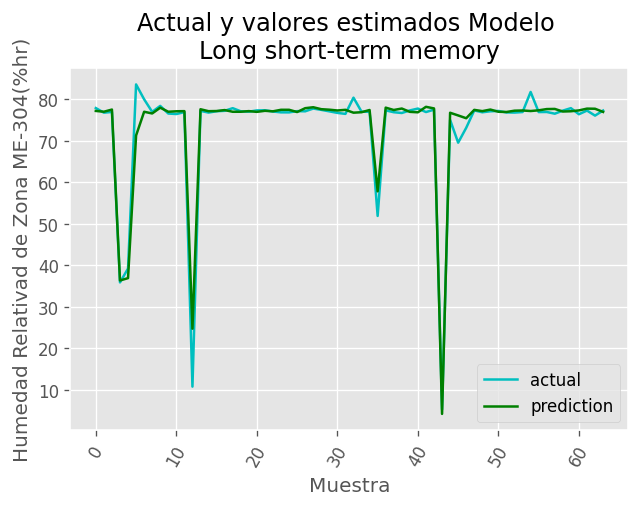

In [14]:
Grafico(y_test,ypred,'Actual y valores estimados Modelo \nLong short-term memory')

In [15]:
V_MAE.append(mean_absolute_error(y_test,ypred))
V_MSE.append(mean_squared_error(y_test,ypred))

# Modelo SimpleRNN

In [16]:
model_RNN=tf.keras.models.load_model("C:/temp/model_RNN")

In [17]:
model_RNN.evaluate(dataset3Test)

194/194 [==============================] - 1s 2ms/step - loss: 21.3892 - mean_absolute_percentage_error: 9.1950


[21.38916015625, 9.194987297058105]

In [18]:
ypred = pred(model_RNN,X_test)

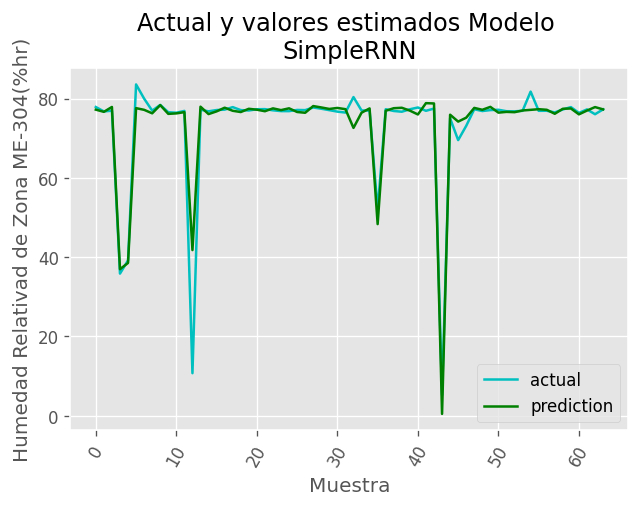

In [19]:
Grafico(y_test,ypred,'Actual y valores estimados Modelo \nSimpleRNN')

In [20]:
V_MAE.append(mean_absolute_error(y_test,ypred))
V_MSE.append(mean_squared_error(y_test,ypred))

# Modelo Gated Recurrent Unit

In [21]:
model_GRU=tf.keras.models.load_model("C:/temp/model_GRU")

In [22]:
model_GRU.evaluate(dataset3Test)

194/194 [==============================] - 1s 4ms/step - loss: 11.8763 - mean_absolute_percentage_error: 4.8365


[11.876338005065918, 4.836524486541748]

In [23]:
ypred = pred(model_GRU,X_test)

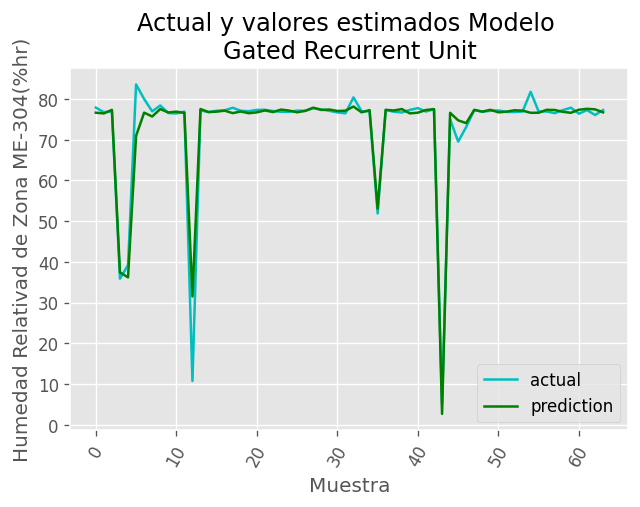

In [24]:
Grafico(y_test,ypred,'Actual y valores estimados Modelo \nGated Recurrent Unit')

In [25]:
V_MAE.append(mean_absolute_error(y_test,ypred))
V_MSE.append(mean_squared_error(y_test,ypred))

# Evaluacion Metricas

In [26]:
modelos=['Long short-term memory','SimpleRNN','Gated Recurrent Unit']
Metricas=pd.DataFrame({'Model':modelos,'MAE':V_MAE,'MSE':V_MSE})
Metricas.head()

,Model,MAE,MSE
0,Long short-term memory,1.296139,7.820636
1,SimpleRNN,1.540761,18.401333
2,Gated Recurrent Unit,1.306143,10.956704
